# ***1.About Dataset***

**New York City Airbnb Data Cleaning**

Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

**About Dataset**

***Context***

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

**Content**

The following Airbnb activity is included in this New York dataset:

Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

# ***2.Call Libraries***

In [1]:

#  For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng
import missingno as msno
#  For plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#  For data Minor processing
from sklearn.preprocessing import StandardScaler



#  OS related
import os

In [2]:
 #Display multiple outputs from a jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ***3. Read and Explore Dataset***

##**Read Dataset**

In [3]:
df = pd.read_csv("../input/airbnbopendata/Airbnb_Open_Data.csv");

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


###Overview Dataset

Display First Five rows of dataset

In [4]:

df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Display First last rows of dataset

In [5]:
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN




*   Print the shape of data




In [6]:
df.shape

(102599, 26)



* Print the name of all the columns  




In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')



* Give the informaion of dataset  




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol



*   Print the Datatypes of the dataset



In [9]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

Obtaining the description of the dataframe

In [10]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [11]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
df.duplicated().sum()

541

In [13]:
df.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

# ***4.Data Cleaning***

Remove the Duplicates if any

In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

541

Let's rename some columns, remove spaces

In [15]:
new_col_names = {
                  'host id'                 : 'Host Id',
                  'host name'               : 'Host Name',
                 'neighbourhood group'      : 'Neighbourhood group' ,
                  'country code'            :  'Country code',
                  'room type'               :  'Room type',
                  'Construction year'       : 'Construction year',
                  'service fee'             : 'Service fee',
                  'number of reviews'       :  'Number of reviews' ,
                  'last review'             :  'Last review',
                  'reviews per month'       : 'Reviews per month',
                  'review rate number'      :  'Review rate number',
          'calculated host listings count'  :'Calculated host listings count',
                  'availability 365'        :  'Availability 365'     ,
       
}

In [16]:
new_col_names

{'host id': 'Host Id',
 'host name': 'Host Name',
 'neighbourhood group': 'Neighbourhood group',
 'country code': 'Country code',
 'room type': 'Room type',
 'Construction year': 'Construction year',
 'service fee': 'Service fee',
 'number of reviews': 'Number of reviews',
 'last review': 'Last review',
 'reviews per month': 'Reviews per month',
 'review rate number': 'Review rate number',
 'calculated host listings count': 'Calculated host listings count',
 'availability 365': 'Availability 365'}

Rename the columns

In [17]:
df.rename(
         columns = new_col_names,
         inplace = True,
         )

See the column Names are changed....

In [18]:
df.columns

Index(['id', 'NAME', 'Host Id', 'host_identity_verified', 'Host Name',
       'Neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'Country code', 'instant_bookable', 'cancellation_policy', 'Room type',
       'Construction year', 'price', 'Service fee', 'minimum nights',
       'Number of reviews', 'Last review', 'Reviews per month',
       'Review rate number', 'Calculated host listings count',
       'Availability 365', 'house_rules', 'license'],
      dtype='object')

In [19]:
#check renaming

df.head()
df.columns.values

,id,NAME,Host Id,host_identity_verified,Host Name,Neighbourhood group,neighbourhood,lat,long,country,...,Service fee,minimum nights,Number of reviews,Last review,Reviews per month,Review rate number,Calculated host listings count,Availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


array(['id', 'NAME', 'Host Id', 'host_identity_verified', 'Host Name',
       'Neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'Country code', 'instant_bookable', 'cancellation_policy',
       'Room type', 'Construction year', 'price', 'Service fee',
       'minimum nights', 'Number of reviews', 'Last review',
       'Reviews per month', 'Review rate number',
       'Calculated host listings count', 'Availability 365',
       'house_rules', 'license'], dtype=object)

Convert column names to a common format: all lowercase and joined by "_".

---




In [20]:
df.columns=[col.lower().replace(" ","_") for col in df.columns]
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

Count the missing values of every column in terms of % and show the result

---



In [21]:
# calculate the % missing values
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,% missing
0,id,0.000000
1,name,0.244959
2,host_id,0.000000
3,host_identity_verified,0.283172
4,host_name,0.395853
5,neighbourhood_group,0.028415
6,neighbourhood,0.015677
7,lat,0.007839
8,long,0.007839
9,country,0.521272


**id and host_id columns:**

In [22]:
df["id"].unique().shape[0]/df["id"].shape[0]*100
print("\n-----\n")
df["host_id"].unique().shape[0]/df["host_id"].shape[0]*100

100.0


-----



99.99902016500421

 Most of these values ​​are distinct for each line. I don't think it makes sense for analysis, so I'll delete them.

---



In [23]:
df.drop(columns=["id","host_id"],axis=1,inplace=True);
df

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


**price and service_fee columns:**

 Convert from object type to float64: remove the $ sign and unwanted characters 

from the records.

---



In [24]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [25]:
df["price"]=df["price"].apply(lambda x: remove_dollar_sign(x))
df["price"]

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 102058, dtype: float64

In [26]:
df["service_fee"]=df["service_fee"].apply(lambda x: remove_dollar_sign(x))
df["service_fee"]

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053      NaN
102054      NaN
102055      NaN
102056      NaN
102057      NaN
Name: service_fee, Length: 102058, dtype: float64

**house_rules and license columns:**

 Because there are a high number of Nan values, I will delete them.

---



In [27]:
df.drop(columns=["house_rules","license"], axis=1, inplace=True)

Changing "last review" to pandas datetime

In [28]:
df["last_review"]=pd.to_datetime(df["last_review"])

***Data after processing***

In [29]:
df.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,...,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0


In [30]:
df.shape
print("\n-----\n")
df.dtypes

(102058, 22)


-----



name                                      object
host_identity_verified                    object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country_code                              object
instant_bookable                          object
cancellation_policy                       object
room_type                                 object
construction_year                        float64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
review_rate_number                       float64
calculated_host_list

In [31]:
df.isnull().sum()

name                                250
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country_code                        131
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [32]:

df.nunique()

name                              61281
host_identity_verified                2
host_name                         13190
neighbourhood_group                   7
neighbourhood                       224
lat                               21991
long                              17774
country                               1
country_code                          1
instant_bookable                      2
cancellation_policy                   3
room_type                             4
construction_year                    20
price                              1151
service_fee                         231
minimum_nights                      153
number_of_reviews                   476
last_review                        2477
reviews_per_month                  1016
review_rate_number                    5
calculated_host_listings_count       78
availability_365                    438
dtype: int64

##**Visualizing Missing Data**

 Visualization of missing values in each column

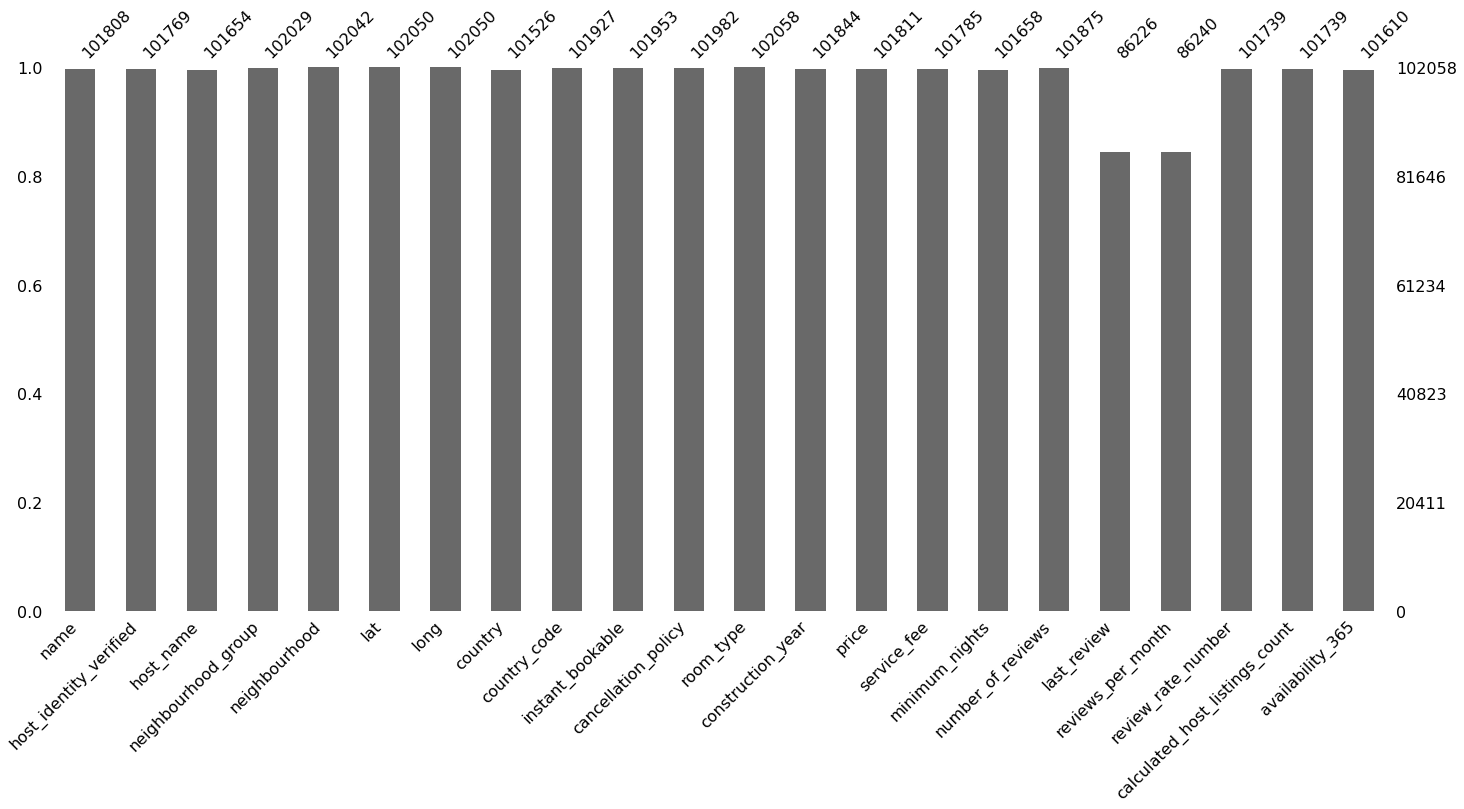

In [33]:
msno.bar(df);

 Heatmap to see correlation of existance of data between columns


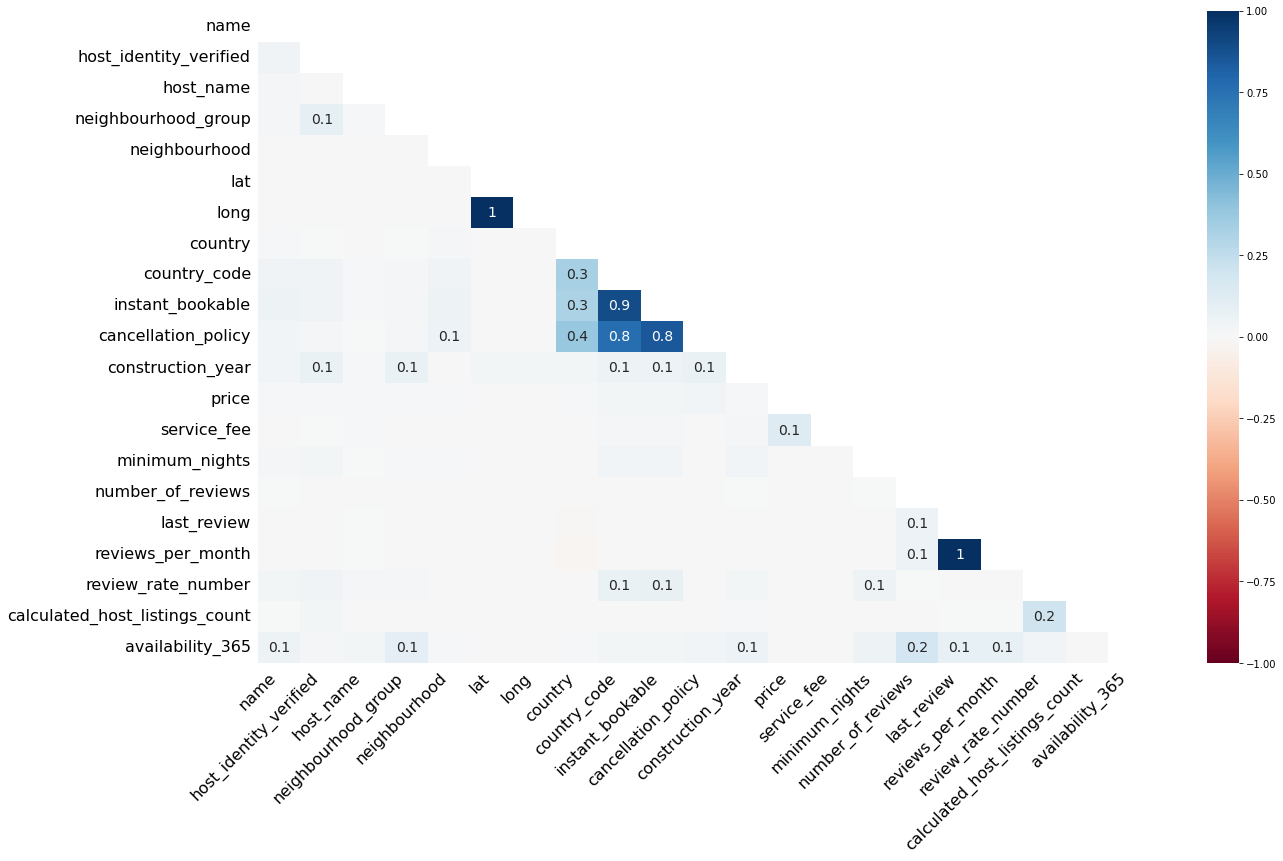

In [34]:
msno.heatmap(df);



  
* This heatmap tells us that entries with "instant_bookable" or 
"cancellation_policy" filled usually have "country code" filled as opposed to the ones that don't. Similar for "cancellation_policy" and "instant_bookable". And 100% of the entries with "reviews per month" filled also have "last review" filled



#***5.Data Visualization***

In [35]:
def plot_bar_chart(column_name: str, hue: str=None, top_values: int = None, palette: str = "flare", show_grid : bool = True, 
                   figsize: tuple = (16, 9), bar_font_size: int=14, bar_angle: int=45, angle: int=45):
    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = figsize)
    ax = plt.subplot(1, 1, 1)
    
    ax.set_facecolor((247/255, 247/255, 247/255))
    counts = None
    
    if top_values is not None:
        counts =df[column_name].value_counts().iloc[:top_values]
    else:
        counts = df[column_name].value_counts()
        
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = df[hue] if hue is not None else None) 
    
                               
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight="bold", fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize = 18)
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize = 27)
    if show_grid: plt.grid()
    plt.show()

In [36]:
# create a function to plot pie/donut chart
def plot_pie_chart(column_name: str, startangle: int=45, loc: str="center", explodes: float=0.09, colors: list = None):
    values = df[column_name].value_counts()
    keys = values.keys()
    total_records = df[column_name].count()

    labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]

    plt.subplots(figsize = (16, 9))
    # draw the pie chart
    patches, texts = plt.pie(values, startangle = startangle, explode = explodes, colors = colors)

    # draw circle
    center_circle = plt.Circle(xy = (0, 0), radius = 0.70, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.title(column_name, fontsize = 25, fontweight = "bold")
    plt.legend(patches, labels, loc=loc, fontsize = 14)
    plt.show()

In [37]:
# create a function to plot line chart
def plot_line_chart(column_name, xlabel, ylabel, title):
    value =df[column_name].value_counts().sort_index()
    keys = np.array(value.keys(), dtype = np.int16)

    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = (16, 7))
    ax  = plt.subplot(1, 1, 1)
    ax.set_facecolor((247/255, 247/255, 247/255))
    ax.plot(value, 'o--', c="black", markerfacecolor='none', markersize=12, markeredgecolor="red", markeredgewidth = 3, linewidth=2)
    plt.xlabel(xlabel, fontsize = 20, fontweight = "bold")
    plt.ylabel(ylabel, fontsize = 20, fontweight = "bold")
    plt.xticks(ticks = keys, fontsize = 12, rotation = 15)
    plt.title(title, fontsize = 24, fontweight = "bold")
    plt.show()

**Top 50 popular Name**

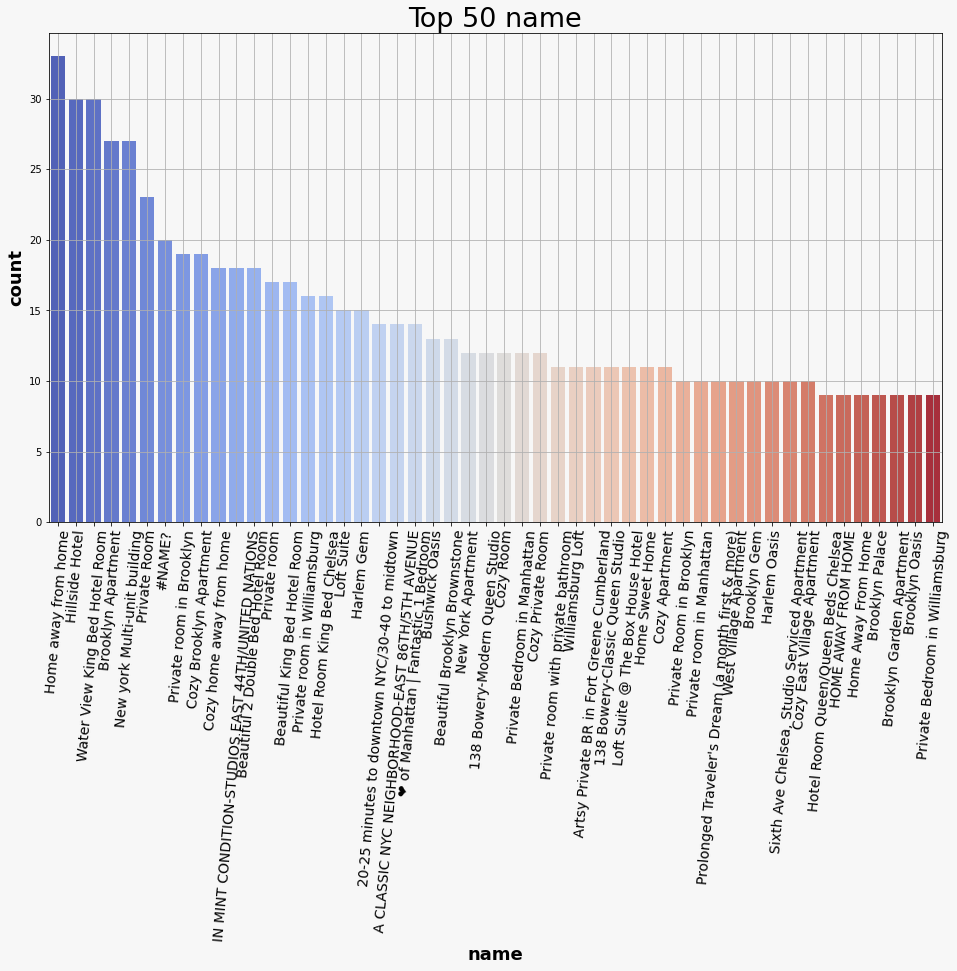

In [38]:
plot_bar_chart(column_name = "name", top_values = 50, palette = "coolwarm", show_grid = True, angle = 85)

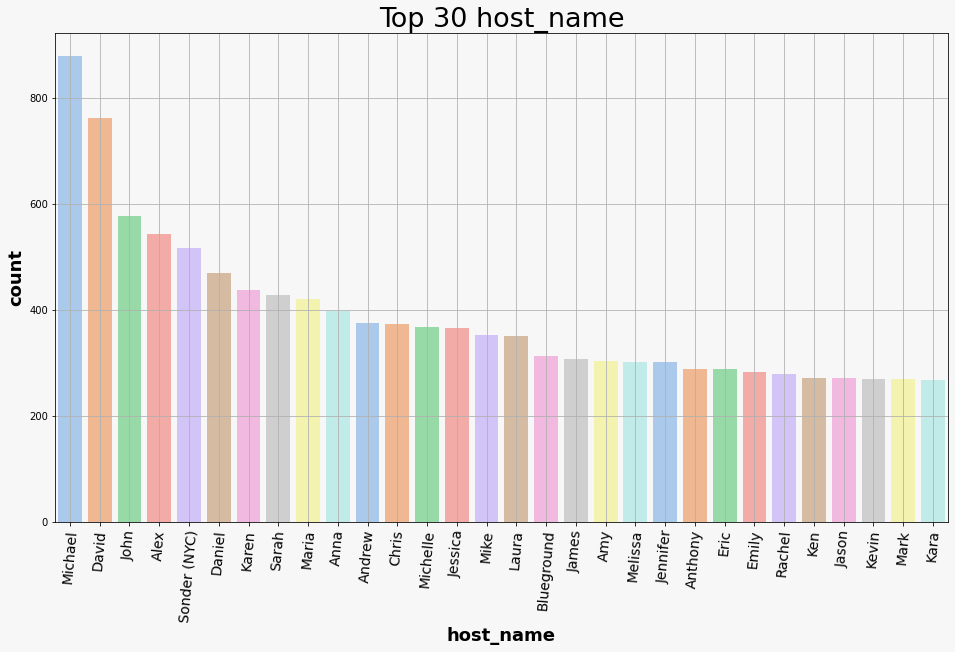

In [39]:
plot_bar_chart(column_name = "host_name", top_values = 30, palette = "pastel", show_grid = True, angle = 85)

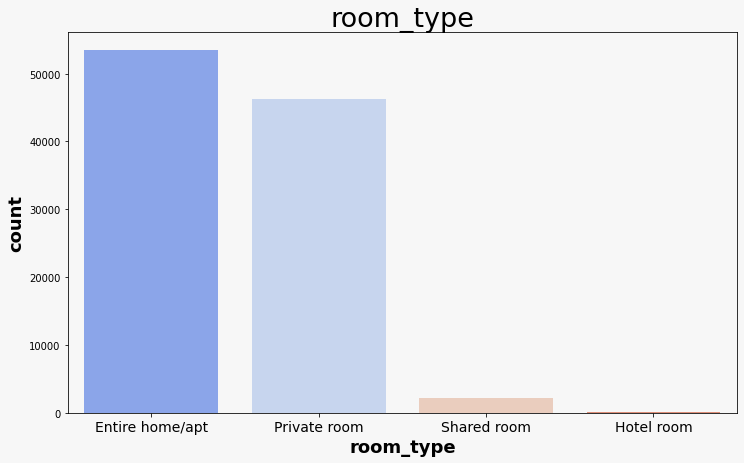

In [40]:
#plot the barchart for type of rooms

plot_bar_chart(column_name="room_type",  show_grid=False, bar_angle=0, angle=0, figsize = (12, 7),palette="coolwarm" )

**Room Type distribution**

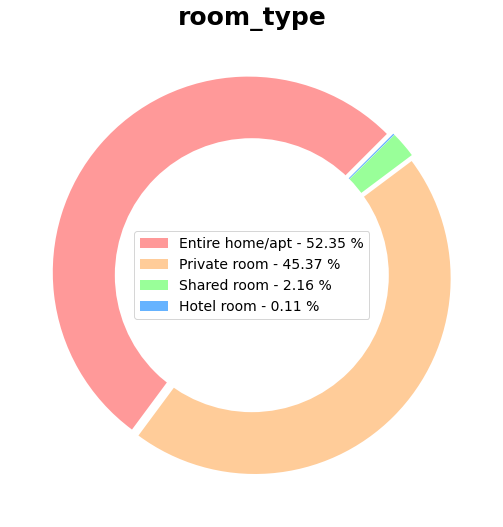

In [41]:
#plot the pie chart for types of rooms

plot_pie_chart(column_name="room_type", colors = ['#ff9999','#ffcc99','#99ff99','#66b3ff'])

**Mostly Private room and Ebtire home/apt. Very few Shared room and Hotel room types**

**neighbourhood_group**

In [42]:
df['tmp']=3
fig=px.pie(df, names="neighbourhood_group", values='tmp',hole=0.6, title="Neighbourhood group distribution")
fig.update_layout(title_text="Neighbourhood group percentage",
                  annotations=[dict(text='Neighbourhood group', x=0.5, y=0.5, font_size=10, showarrow=False)])

**cancellation_policy**

In [43]:

fig=px.pie(df, names="cancellation_policy", values='tmp',hole=0.6, title="Cancellation policy distribution")

fig.update_layout(title_text="Cancellation policy percentage",
                  annotations=[dict(text='Cancellation policy', x=0.5, y=0.5, font_size=10, showarrow=False)])

**Construction year**

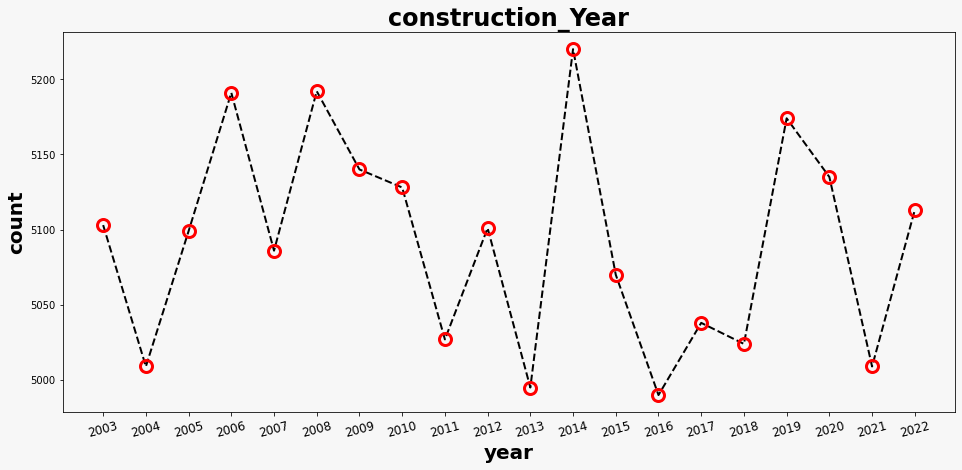

In [44]:
#plot the line chart  for construction year and year,count

plot_line_chart("construction_year", "year", "count", "construction_Year")

**Relationship between price and service fee**

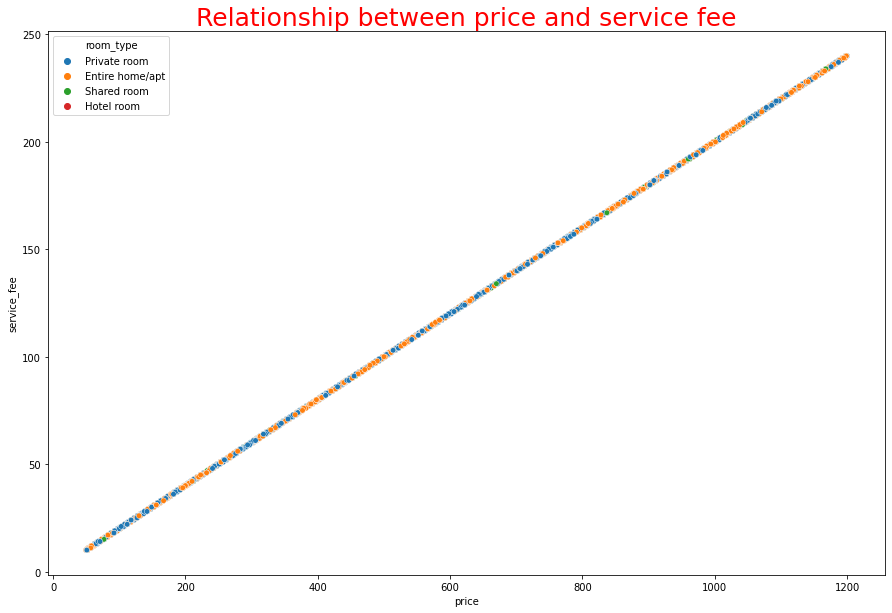

In [45]:
plt.figure(figsize=(15,10))
plt.title("Relationship between price and service fee", size=25, color="red")
sns.scatterplot(x=df.price, y=df.service_fee, hue=df.room_type, s=30);

The above plot wants to tell that "if the room price is high, the service price will also be high in all room types".

**plot boxplot for room type and price**

<AxesSubplot:xlabel='room_type', ylabel='price'>

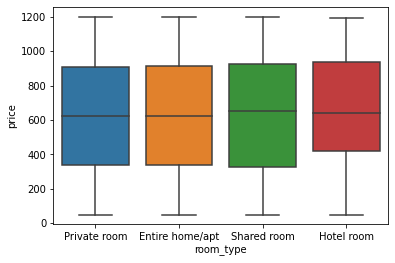

In [46]:
# plot boxplot for room type and price

sns.boxplot(y = 'price',       
            x = 'room_type',    
            data = df
            )

From this plot we can observe the price of the rooms

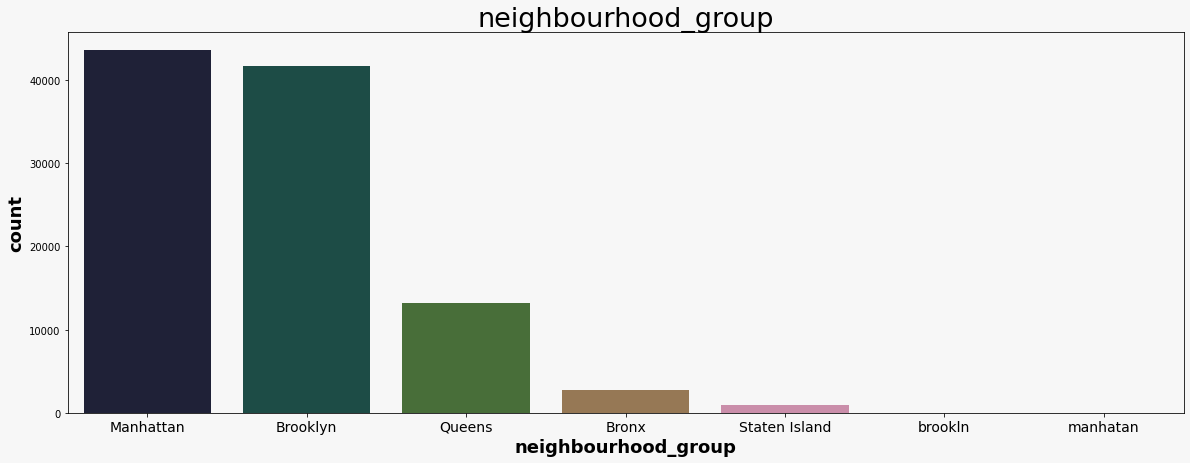

In [47]:
#plot the barchart for  each neighbourhood group 

plot_bar_chart("neighbourhood_group", palette = "cubehelix", show_grid = False, bar_angle = 0, figsize = (20, 7), angle = 0)


  This plot is the observation of neighbourhood_group  with 5-manhattan,brooklyn,queens,bronx,and staten island and manhattan having most counts